In [1]:

import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

/Users/ganeshnagaraja/miniconda3/envs/LLM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DEVICE="cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE="cuda"
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE="mps"
print(f"Using Device - {DEVICE}")

Using Device - cpu


In [3]:
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")

In [4]:
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

100%|██████████| 90/90 [1:10:28<00:00, 46.98s/it]   


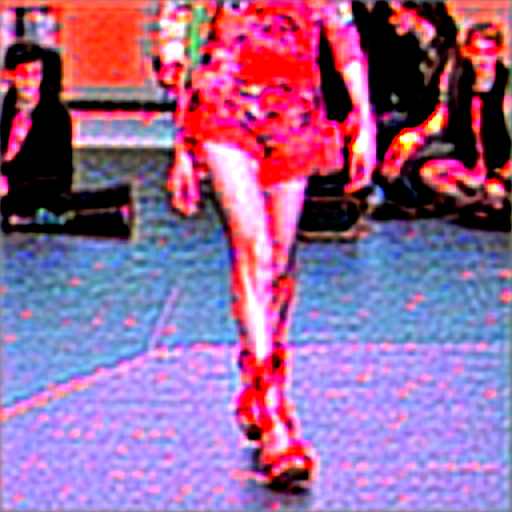

In [ ]:
## Text to Image

prompt = "A dog stretching on the floor, highly detailed, ultra sharp, 4k resolution"
uncond_promt = ""
do_cfg = True
cfg_scale = 10

## Image to Image

input_image = None
image_path = "../images/dog.jpeg"
input_image = Image.open(image_path)
strength = 0.4

sampler = 'ddpm'
num_inference_steps = 100
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_promt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer
)

Image.fromarray(output_image)